VT es vino tinto y VB es vino blanco!

1. Limpieza de Datos

In [47]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import zipfile
with zipfile.ZipFile('wine+quality.zip', 'r') as zip_ref:
  zip_ref.extractall('.')

# Datasets
red_wine_url = 'winequality-red.csv'
white_wine_url = 'winequality-white.csv'

df_red = pd.read_csv(red_wine_url, sep=';')
df_white = pd.read_csv(white_wine_url, sep=';')

# VT es vino tinto y VB es vino blanco!

# Verificacion de datos duplicados
print(f'Datos duplicados VT: {df_red.duplicated().sum()}')
print(f'Datos duplicados VB: {df_white.duplicated().sum()}')

# Eliminar datos duplicados
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

# Verificar nuevamente que se hayan eliminado
print(f'Datos duplicados limpios VT: {df_red.duplicated().sum()}')
print(f'Datos duplicados limpios VB: {df_white.duplicated().sum()}')

# DataFrame del VT
print("DataFrame de VT:")
print(df_red.head())
print(df_red.info())
print(df_red.describe())

# DataFrame del VB
print("\nDataFrame de VB:")
print(df_white.head())
print(df_white.info())
print(df_white.describe())

# Valores nulos del VT
print("Valores nulos VT:")
print(df_red.isnull().sum())

# Valores nulos del VB
print("Valores nulos VB:")
print(df_white.isnull().sum())

df_red = df_red.drop_duplicates()

df_white = df_white.drop_duplicates()



Datos duplicados VT: 240
Datos duplicados VB: 937
Datos duplicados limpios VT: 0
Datos duplicados limpios VB: 0
DataFrame de VT:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0          

2. Exploracion de datos

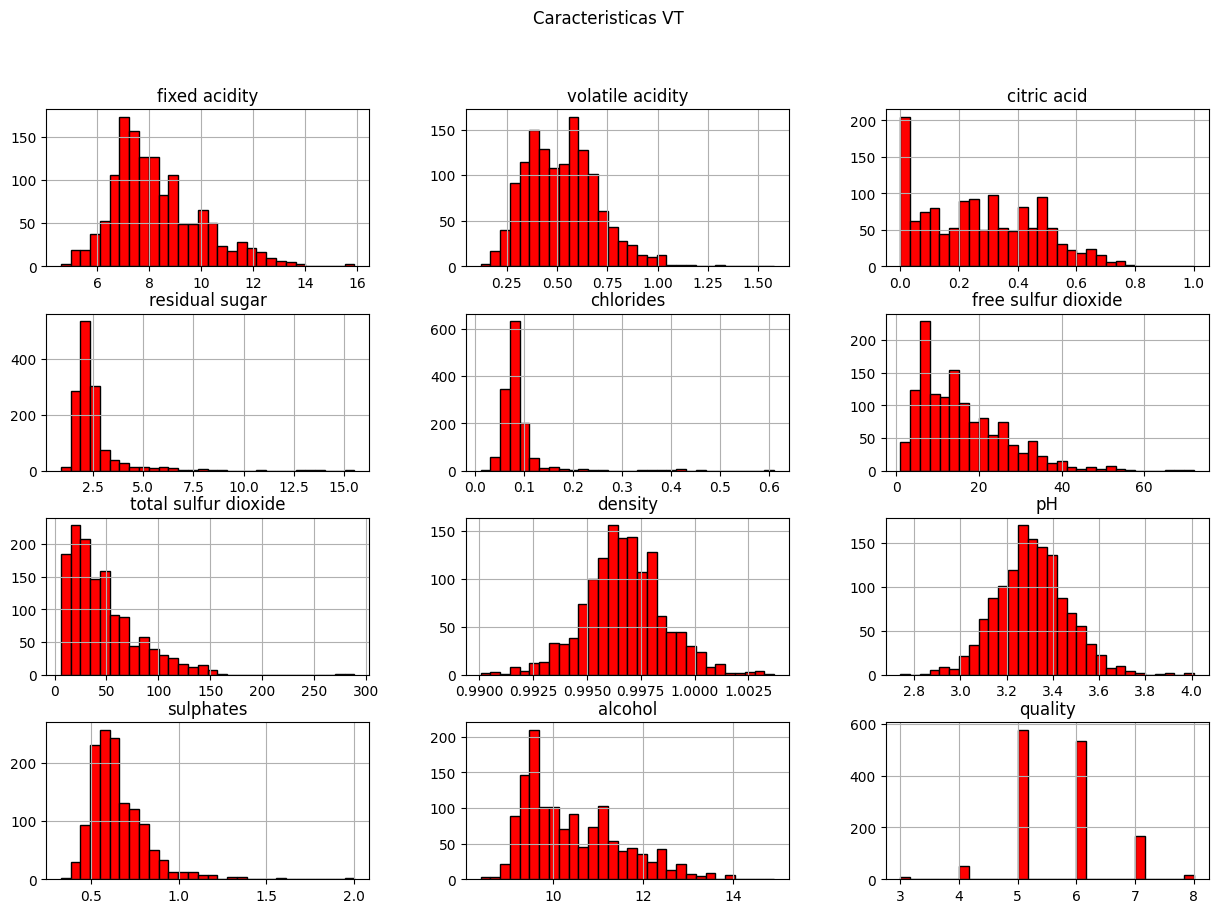

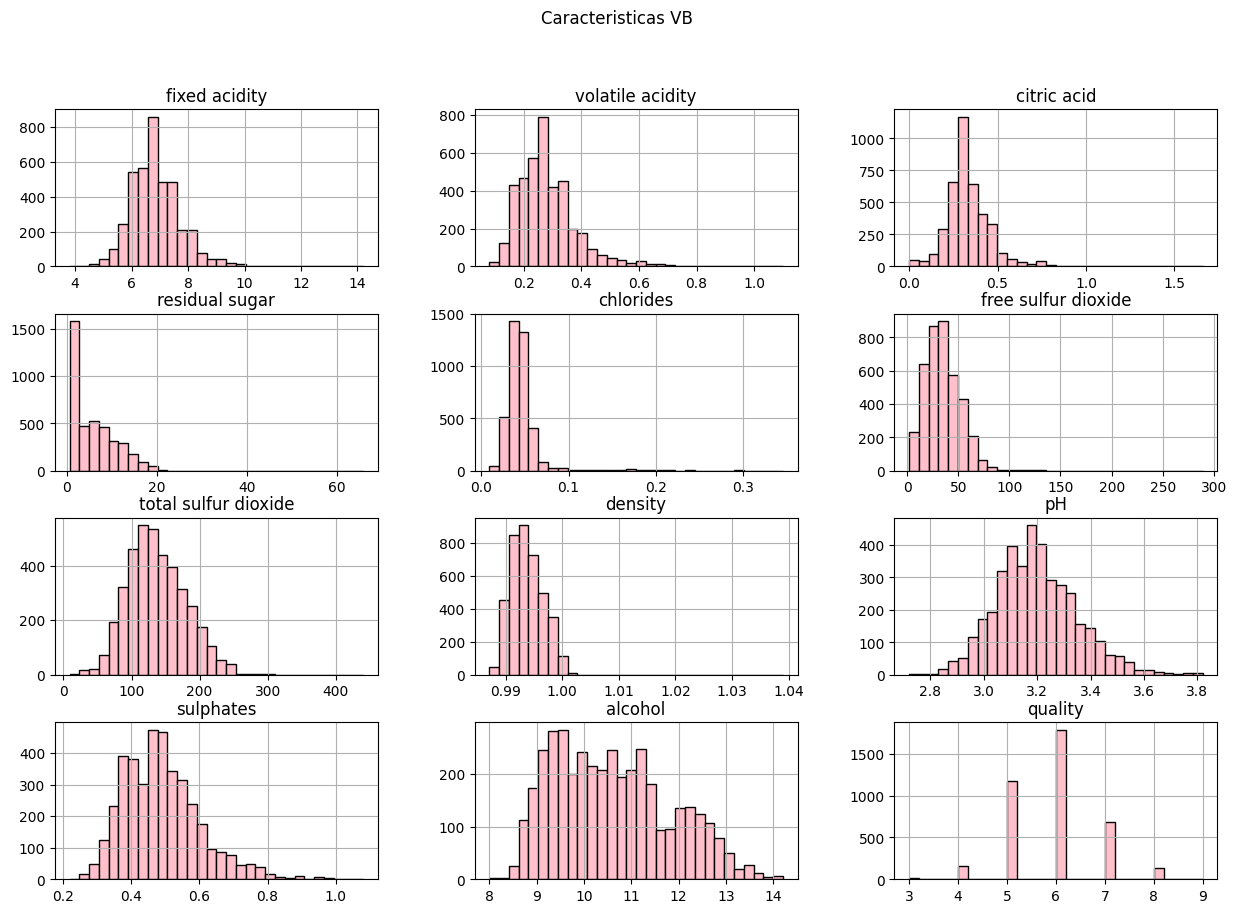

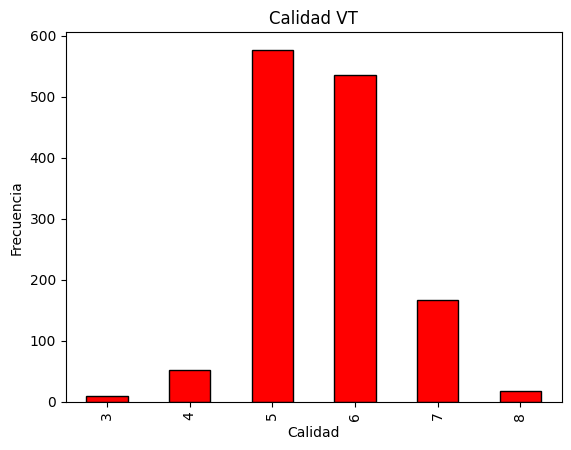

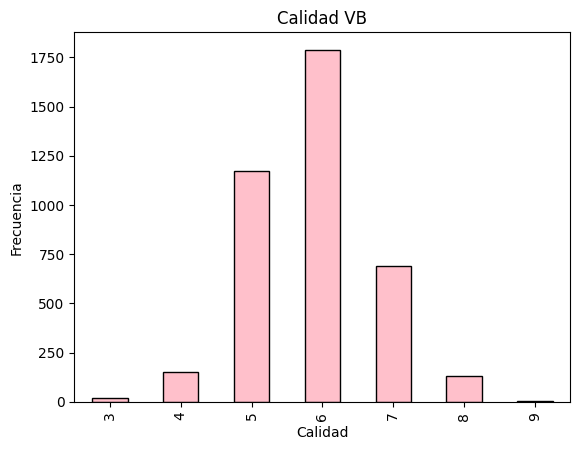

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma de caracteristicas de VT
df_red.hist(bins=30, figsize=(15, 10), edgecolor='k', color ='red')
plt.suptitle('Caracteristicas VT')
plt.show()

# Histograma de caracteristicas de VB
df_white.hist(bins=30, figsize=(15, 10), edgecolor='k', color= 'pink')
plt.suptitle('Caracteristicas VB')
plt.show()

# Grafico de barras de VT
df_red['quality'].value_counts().sort_index().plot(kind='bar', color='red', edgecolor='k')
plt.title('Calidad VT')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de VB
df_white['quality'].value_counts().sort_index().plot(kind='bar', color='pink',edgecolor='k')
plt.title('Calidad VB')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()



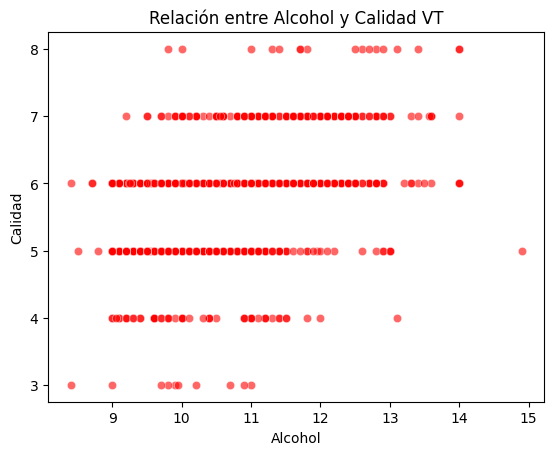

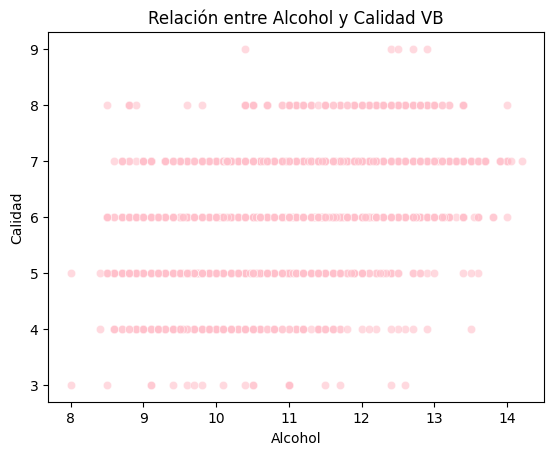

In [46]:
# Diagrama de dispersión con seaborn
sns.scatterplot(data=df_red, x='alcohol', y='quality', color='red', alpha=0.6)

plt.title('Relación entre Alcohol y Calidad VT')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

# Diagrama de dispersión para dos variables
sns.scatterplot(data=df_white, x='alcohol', y='quality', color='pink', alpha=0.6)

plt.title('Relación entre Alcohol y Calidad VB')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

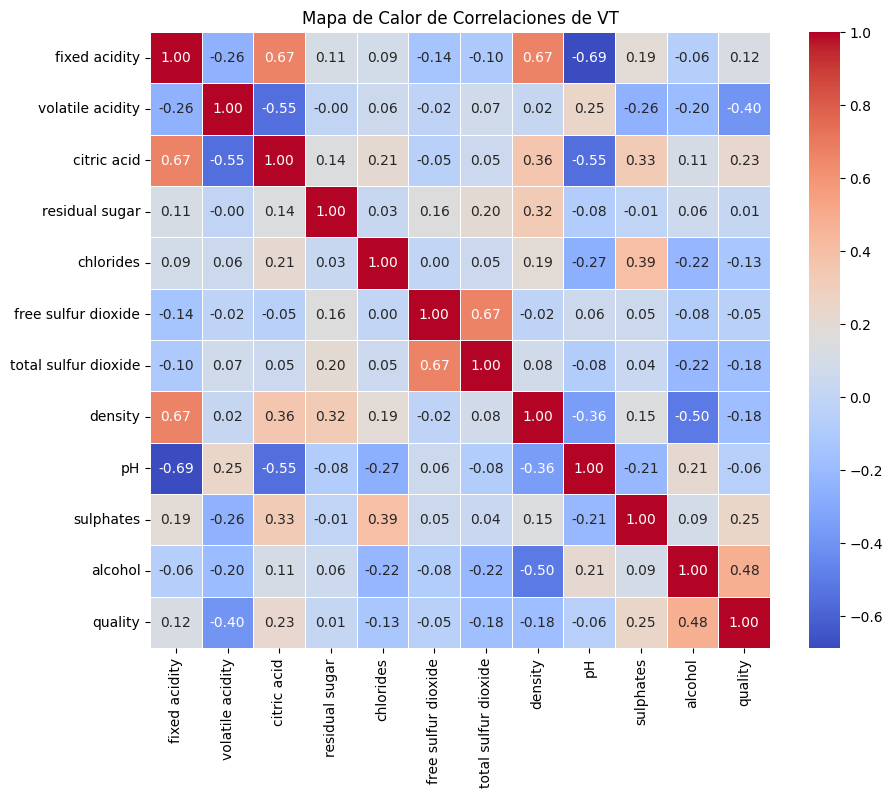

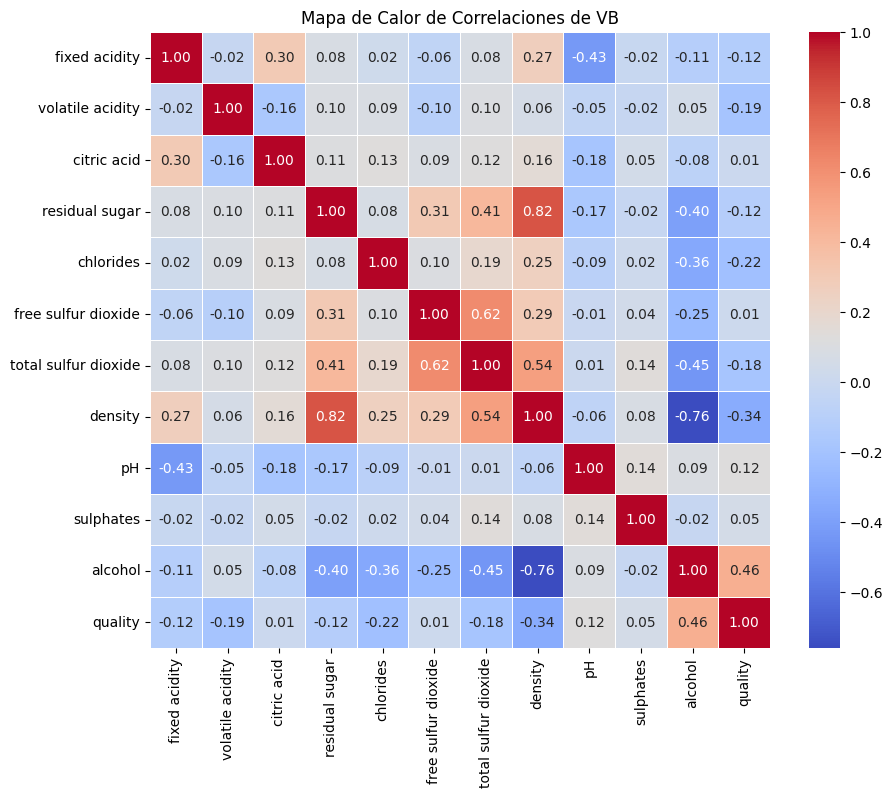

In [24]:
# Matriz de correlación
correlation_matrix = df_red.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Calor de Correlaciones de VT')
plt.show()

correlation_matrix = df_white.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Calor de Correlaciones de VB')
plt.show()

In [26]:

# Calcular media, mediana, moda, rango, desviación estándar y varianza
print("Estadisticas descriptivas de VT")
estadisticas = pd.DataFrame({
    'Media': df_red.mean(),
    'Mediana': df_red.median(),
    'Moda': df_red.mode().iloc[0],  # Primera moda (puede haber más de una)
    'Rango': df_red.max() - df_red.min(),
    'Desviación Estándar': df_red.std(),
    'Varianza': df_red.var()
})

# Mostrar las estadísticas
print(estadisticas)



Estadisticas descriptivas de VT
                          Media  Mediana     Moda      Rango  \
fixed acidity          8.310596   7.9000   7.2000   11.30000   
volatile acidity       0.529478   0.5200   0.5000    1.46000   
citric acid            0.272333   0.2600   0.0000    1.00000   
residual sugar         2.523400   2.2000   2.0000   14.60000   
chlorides              0.088124   0.0790   0.0800    0.59900   
free sulfur dioxide   15.893304  14.0000   6.0000   71.00000   
total sulfur dioxide  46.825975  38.0000  28.0000  283.00000   
density                0.996709   0.9967   0.9968    0.01362   
pH                     3.309787   3.3100   3.3000    1.27000   
sulphates              0.658705   0.6200   0.5400    1.67000   
alcohol               10.432315  10.2000   9.5000    6.50000   
quality                5.623252   6.0000   5.0000    5.00000   

                      Desviación Estándar     Varianza  
fixed acidity                    1.736990     3.017134  
volatile acidity     

In [27]:

# Calcular media, mediana, moda, rango, desviación estándar y varianza
print("Estadisticas descriptivas de VT")
estadisticas = pd.DataFrame({
    'Media': df_red.mean(),
    'Mediana': df_red.median(),
    'Moda': df_red.mode().iloc[0],
    'Rango': df_red.max() - df_red.min(),
    'Desviación Estándar': df_red.std(),
    'Varianza': df_red.var()
})

# Mostrar las estadísticas
print(estadisticas)

# VB
print("Estadisticas descriptivas de VB")
estadisticas = pd.DataFrame({
    'Media': df_white.mean(),
    'Mediana': df_white.median(),
    'Moda': df_white.mode().iloc[0],
    'Rango': df_white.max() - df_white.min(),
    'Desviación Estándar': df_white.std(),
    'Varianza': df_white.var()
})


print(estadisticas)

Estadisticas descriptivas de VT
                          Media  Mediana     Moda      Rango  \
fixed acidity          8.310596   7.9000   7.2000   11.30000   
volatile acidity       0.529478   0.5200   0.5000    1.46000   
citric acid            0.272333   0.2600   0.0000    1.00000   
residual sugar         2.523400   2.2000   2.0000   14.60000   
chlorides              0.088124   0.0790   0.0800    0.59900   
free sulfur dioxide   15.893304  14.0000   6.0000   71.00000   
total sulfur dioxide  46.825975  38.0000  28.0000  283.00000   
density                0.996709   0.9967   0.9968    0.01362   
pH                     3.309787   3.3100   3.3000    1.27000   
sulphates              0.658705   0.6200   0.5400    1.67000   
alcohol               10.432315  10.2000   9.5000    6.50000   
quality                5.623252   6.0000   5.0000    5.00000   

                      Desviación Estándar     Varianza  
fixed acidity                    1.736990     3.017134  
volatile acidity     

Modelos de clasificacion - Logistic regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir en características (X) y objetivo (y)
X_red = df_red.drop(columns=['quality'])
y_red = df_red['quality']

# Dividir en conjuntos de entrenamiento y prueba
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42, stratify=y_red)

# Normalizar las características
scaler = StandardScaler()
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)

# Vino blanco
X_white = df_white.drop(columns=['quality'])
y_white = df_white['quality']

# Dividir en conjuntos de entrenamiento y prueba
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42, stratify=y_white)

# Normalizar las características
scaler = StandardScaler()
X_train_white = scaler.fit_transform(X_train_white)
X_test_white = scaler.transform(X_test_white)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear y entrenar el modelo
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_red, y_train_red)

# Realizar predicciones
y_pred_logistic = logistic_model.predict(X_test_red)

# Evaluar el modelo
accuracy = accuracy_score(y_test_red, y_pred_logistic)
precision = precision_score(y_test_red, y_pred_logistic, average='weighted',zero_division=1)
recall = recall_score(y_test_red, y_pred_logistic, average='weighted',zero_division=1)
f1 = f1_score(y_test_red, y_pred_logistic, average='weighted',zero_division=1)

# Imprimir las métricas
print("Resultados de Logistic Regression de Vino Tinto:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#Vino blanco
logistic_model.fit(X_train_white, y_train_white)

y_pred_logistic = logistic_model.predict(X_test_white)

accuracy = accuracy_score(y_test_white, y_pred_logistic)
precision = precision_score(y_test_white, y_pred_logistic, average='weighted',zero_division=1)
recall = recall_score(y_test_white, y_pred_logistic, average='weighted',zero_division=1)
f1 = f1_score(y_test_white, y_pred_logistic, average='weighted',zero_division=1)

print("Resultados de Logistic Regression de Vino Blanco:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Resultados de Logistic Regression de Vino Tinto:
Accuracy: 0.58
Precision: 0.60
Recall: 0.58
F1-Score: 0.55
Resultados de Logistic Regression de Vino Blanco:
Accuracy: 0.53
Precision: 0.54
Recall: 0.53
F1-Score: 0.50


Implementacion de KNeighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear y entrenar el modelo con k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_red, y_train_red)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test_red)

# Evaluar el modelo
accuracy = accuracy_score(y_test_red, y_pred_knn)
precision = precision_score(y_test_red, y_pred_knn, average='weighted',zero_division=1)  # 'weighted' para multiclase
recall = recall_score(y_test_red, y_pred_knn, average='weighted',zero_division=1)
f1 = f1_score(y_test_red, y_pred_knn, average='weighted',zero_division=1)

# Imprimir las métricas
print("Resultados de K-Nearest Neighbors para VT:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#Vino blanco
knn_model.fit(X_train_white, y_train_white)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test_white)

# Evaluar el modelo
accuracy = accuracy_score(y_test_white, y_pred_knn)
precision = precision_score(y_test_white, y_pred_knn, average='weighted',zero_division=1)  # 'weighted' para multiclase
recall = recall_score(y_test_white, y_pred_knn, average='weighted',zero_division=1)
f1 = f1_score(y_test_white, y_pred_knn, average='weighted',zero_division=1)

# Imprimir las métricas
print("Resultados de K-Nearest Neighbors para VB:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Resultados de K-Nearest Neighbors para VT:
Accuracy: 0.56
Precision: 0.55
Recall: 0.56
F1-Score: 0.55
Resultados de K-Nearest Neighbors para VB:
Accuracy: 0.49
Precision: 0.48
Recall: 0.49
F1-Score: 0.47


El modelo de Logistic Regression ha tenido mejores resultados porque las relaciones entre las características químicas y la calidad del vino son en su mayoría lineales